In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

C:\Users\jerem\AppData\Local\Continuum\anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [2]:
!ls

1.png
10.png
11.png
12.png
13.png
14.png
15.png
16.png
17.png
2.png
3.png
4.png
5.png
6.png
7.png
8.png
9.png
akaze_akaze
akaze_brief
akaze_brisk
akaze_freak
akaze_orb
akze_sift
brisk_brief
brisk_brisk
brisk_freak
brisk_orb
brisk_sift
fast_brief
fast_brisk
fast_freak
fast_orb
fast_sift
harris_brief
harris_brisk
harris_freak
harris_orb
harris_sift
orb_brief
orb_brisk
orb_freak
orb_orb
orb_sift
shi_brief
shi_brisk
shi_freak
shi_orb
shi_sift
sift_brief
sift_brisk
sift_freak
sift_orb
sift_sift
Untitled.ipynb


In [13]:
import os
import re

files = os.listdir()
data_files = []

for file in files:
    if not len(file.split('.')) > 1:
        data_files.append(file)

In [25]:
data = []

with open(data_files[1], 'r') as f:
    line = f.readline()
    cnt = 1
    values =[]
    while line:
        match = re.search(r'TTC Lidar: ([\d.]+)', line)
        match2 = re.search(r'TTC Camera: ([\d.]+)', line)
        if match:
            values.append(match.group(1))
        if match2:
            values.append(match2.group(1))
            
        if len(values) == 2:
            data.append(values)
            values = []
            
        line = f.readline()
        cnt += 1

In [26]:
data

[['12.9722', '9.48477'],
 ['12.264', '8.13167'],
 ['13.9161', '10.9777'],
 ['7.11572', '188.974'],
 ['16.2511', '13.5787'],
 ['12.4213', '14.6447'],
 ['34.3404', '11.0537'],
 ['9.34376', '17.5689'],
 ['18.1318', '14.4271'],
 ['18.0318', '7.08145'],
 ['3.83244', '11.5032'],
 ['10.8537', '10.4551'],
 ['9.22307', '12.9098'],
 ['10.9678', '10.3174'],
 ['8.09422', '12.2635'],
 ['3.17535', '9.86448'],
 ['9.99424', '8.10511'],
 ['8.30978', '9.91809']]

In [93]:
def load_file(path):

    data = []

    with open(path, 'r') as f:
        line = f.readline()
        name = line.split('\n')[0]
        cnt = 1
        values =[]
        while line:
            match = re.search(r'TTC Lidar: ([\d.]+)', line)
            match2 = re.search(r'TTC Camera: ([\d.]+)', line)
            if match:
                values.append(match.group(1))
            if match2:
                values.append(match2.group(1))

            if len(values) == 2:
                data.append(values)
                values = []

            line = f.readline()
            cnt += 1
            
    return name, pd.DataFrame(data=data, columns=['TTC Lidar', 'TTC Camera']).apply(pd.to_numeric)

In [94]:
name, df = load_file(data_files[0])
print(name)
df

FAST AKAZE


,TTC Lidar,TTC Camera
0,12.97220,11.66070
1,12.26400,14.69630
2,13.91610,12.24970
3,7.11572,14.13840
4,16.25110,16.60020
5,12.42130,14.37270
6,34.34040,14.69680
7,9.34376,13.19800
8,18.13180,14.36790
9,18.03180,11.62130


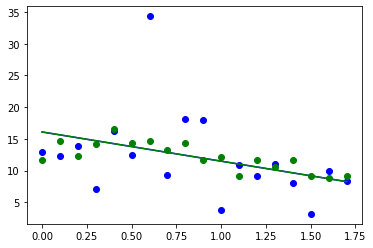

In [95]:
from sklearn.linear_model import LinearRegression

model = LinearRegression().fit((df.index.values*0.1).reshape(-1,1), df['TTC Lidar'].values)
pred = model.predict((df.index.values*0.1).reshape(-1,1))

model2 = LinearRegression().fit((df.index.values*0.1).reshape(-1,1), df['TTC Camera'].values)
pred2 = model.predict((df.index.values*0.1).reshape(-1,1))

plt.plot(df.index*0.1, df['TTC Lidar'], 'bo');
plt.plot(df.index*0.1, pred, 'b-');
plt.plot(df.index*0.1, df['TTC Camera'], 'go');
plt.plot(df.index*0.1, pred2, 'g-');

In [129]:
def plot_file(path, save=False):
    
    name, df = load_file(path)
    
    model = LinearRegression().fit((df.index.values*0.1).reshape(-1,1), df['TTC Lidar'].values)
    pred = model.predict((df.index.values*0.1).reshape(-1,1))

    model2 = LinearRegression().fit((df.index.values*0.1).reshape(-1,1), df['TTC Camera'].values)
    pred2 = model2.predict((df.index.values*0.1).reshape(-1,1))

    plt.plot(df.index*0.1, df['TTC Lidar'], 'bo');
    plt.plot(df.index*0.1, pred, 'b--');
    plt.plot(df.index*0.1, df['TTC Camera'], 'go');
    plt.plot(df.index*0.1, pred2, 'g--');
    plt.title(name);
    plt.legend(['TTC Lidar: 3$\sigma$ {}'.format(np.round(df['TTC Lidar'].std()*3, 2)), '', 'TTC Camera: 3$\sigma$ {}'.format(np.round(df['TTC Camera'].std()*3, 2)), ''])
    
    if save:
        plt.savefig(name);
        plt.close();

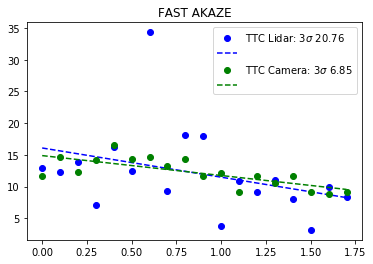

In [130]:
plot_file(data_files[0])

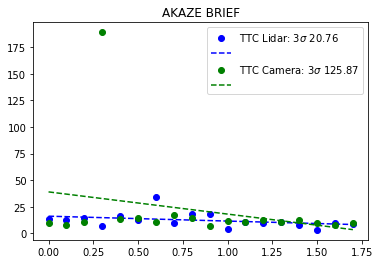

In [131]:
plot_file(data_files[1])

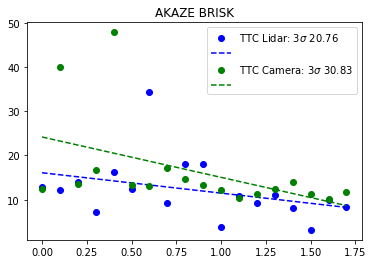

In [132]:
plot_file(data_files[2])

In [133]:
for file in data_files:
    plot_file(file, True)